In [37]:
import pandas as pd
import numpy as np

# df = {'index': [0, 1, 2],
#       'columns': [{'name': 'name', 'data': ['Egor', 'Arthur', 'Slava']},
#                   {'name': 'age', 'data': [25, 23, 27]}
#                  ]
#      }

df = pd.DataFrame({'name': ['Egor', 'Arthur', 'Slava'], 'age': [25, 23, 27]})
df

,name,age
0,Egor,25
1,Arthur,23
2,Slava,27


In [38]:
df.loc[1]
df['name']

0      Egor
1    Arthur
2     Slava
Name: name, dtype: object

In [39]:
df['name'].str.upper()

0      EGOR
1    ARTHUR
2     SLAVA
Name: name, dtype: object

In [40]:
np.random.seed(40)

np_df = pd.DataFrame(np.random.randn(5, 3), columns=['a', 'b', 'c'])
np_df

,a,b,c
0,-0.607548,-0.126136,-0.684606
1,0.928715,-1.844401,-0.467002
2,2.292490,0.488810,0.710267
3,1.055534,0.054073,0.257953
4,0.588282,0.885244,-1.017007


In [41]:
df.axes

[RangeIndex(start=0, stop=3, step=1), Index(['name', 'age'], dtype='object')]

In [42]:
import time

s1 = time.time()
r1 = df.sum(axis='index')
e1 = time.time()

s2 = time.time()
r2 = df.apply(np.sum, axis=0)
e2 = time.time()

# df.sum(axis=0)
# df.sum(axis=1)
print('r1: {0:.3f}ms\nr2: {1:.3f}ms'.format((e1 - s1)*10**3, (e2 - s2)*10**3))

r1: 0.400ms
r2: 0.315ms


In [43]:
import pandas as pd
import numpy as np
import time

col_names = {
    'Seq.': 'Sequence', 'Bg': 'Background',
    'PL': 'Party leadership', 'CAb': 'Communication ability', 
    'RC': 'Relations with Congress', 'CAp': 'Court appointments', 
    'HE': 'Handling of economy', 'L': 'Luck',
    'AC': 'Ability to compromise', 'WR': 'Willing to take risks', 
    'EAp': 'Executive appointments', 'OA': 'Overall ability', 
    'Im': 'Imagination', 'DA': 'Domestic accomplishments',
    'Int': 'Integrity', 'EAb': 'Executive ability',
    'FPA': 'Foreign policy accomplishments',
    'LA': 'Leadership ability',
    'IQ': 'Intelligence', 'AM': 'Avoid crucial mistakes',
    'EV': "Experts' view", 'O': 'Overall'
}


df = pd.read_csv('./data/siena2018-pres.csv', index_col=0)
ms = df.memory_usage(deep=True).sum()

# df.head()
# df.columns
# df.dtypes
# df.nunique()     # Party to category type
# df.max()         # int64 to uint8 0-255

def transform_df(df: pd.DataFrame) -> pd.DataFrame:
    new_df_types = dict()
    
    for col in df.columns:
        if col == 'Party':
            new_df_types[col] = 'category'
        elif col not in ('Seq.', 'President'):
            new_df_types[col] = 'uint8'

    r_df = (df.astype(new_df_types)
              .rename(columns={k:v.replace(' ', '_') for k, v in col_names.items()}))
    return r_df

t_df = transform_df(df)
t_ms = t_df.memory_usage(deep=True).sum()
print(f'source df memory usage: {ms}\ntransformed df memory usage: {t_ms}\ndelta: {ms / t_ms:.1f}')


source df memory usage: 16485
transformed df memory usage: 7665
delta: 2.2


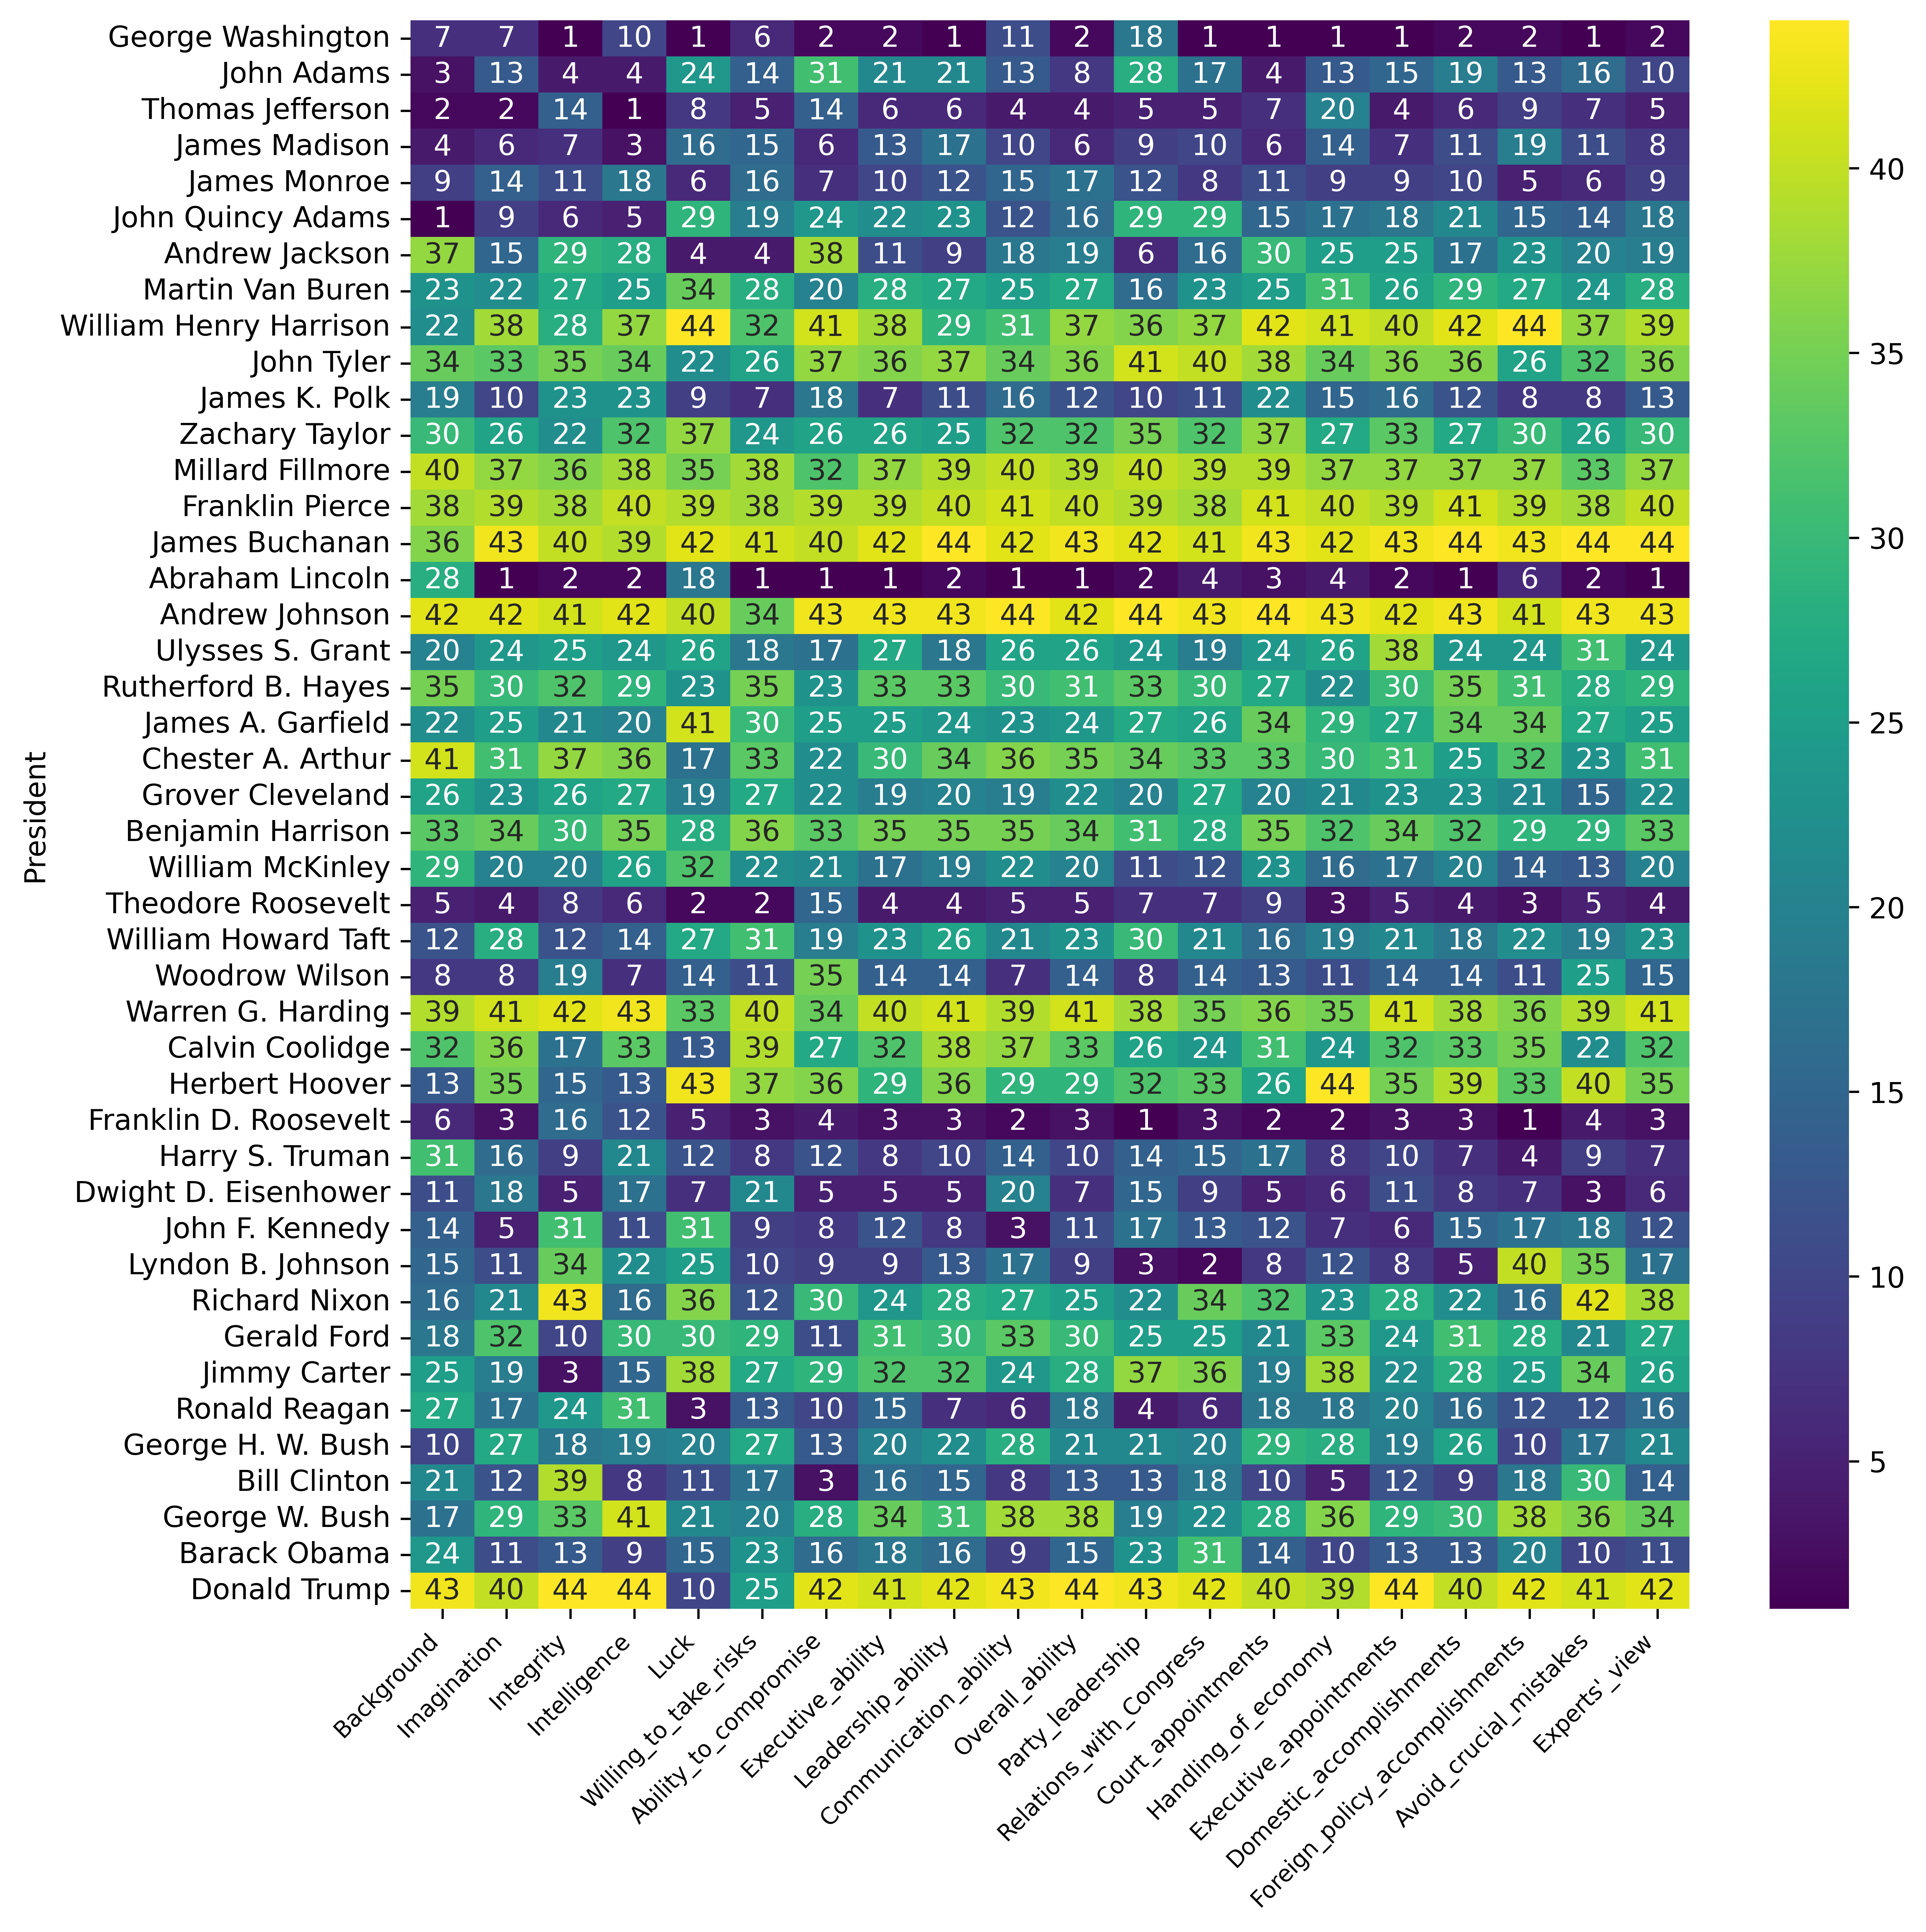

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 10), dpi=600)

hm = sns.heatmap(t_df.set_index('President').iloc[:, 2:-1], annot=True, cmap='viridis', ax=ax)
hm.set_xticklabels(hm.get_xticklabels(), rotation=45, fontsize=8, ha='right')
fig.savefig('./data/plots/20-pres.png', bbox_inches='tight')

In [45]:
import pandas as pd


df = t_df
df.head()
df.tail()
df.sample(5)

,Sequence,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Party_leadership,Relations_with_Congress,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall
25,26,Theodore Roosevelt,Republican,5,4,8,6,2,2,15,...,7,7,9,3,5,4,3,5,4,4
18,18,Ulysses S. Grant,Republican,20,24,25,24,26,18,17,...,24,19,24,26,38,24,24,31,24,24
21,21,Chester A. Arthur,Republican,41,31,37,36,17,33,22,...,34,33,33,30,31,25,32,23,31,34
27,28,Woodrow Wilson,Democratic,8,8,19,7,14,11,35,...,8,14,13,11,14,14,11,25,15,11
33,34,Dwight D. Eisenhower,Republican,11,18,5,17,7,21,5,...,15,9,5,6,11,8,7,3,6,6


In [46]:
# for col, rows in df.items():
#     print(f'column: {col}\ndata:\n{rows}')
#     break

# for idx, row in df.iterrows():
#     print(f'index: {idx}\ndata:\n{row}')
#     break

for tup in df.itertuples():
    print(tup)
    break

Pandas(Index=1, Sequence='1', President='George Washington', Party='Independent', Background=7, Imagination=7, Integrity=1, Intelligence=10, Luck=1, Willing_to_take_risks=6, Ability_to_compromise=2, Executive_ability=2, Leadership_ability=1, Communication_ability=11, Overall_ability=2, Party_leadership=18, Relations_with_Congress=1, Court_appointments=1, Handling_of_economy=1, Executive_appointments=1, Domestic_accomplishments=2, Foreign_policy_accomplishments=2, Avoid_crucial_mistakes=1, _23=2, Overall=1)


In [47]:
import time

scores = df.loc[:, 'Background':'Overall']

s1 = time.time()
r1 = scores.sum(axis=1) / len(scores.columns)
e1 = time.time()

s2 = time.time()
r2 = scores.mean(axis=1)
e2 = time.time()

print(f'sum >> len: {(e1 - s1)*10**3:.3f}ms\nmean: {(e2 - s2)*10**3:.3f}ms')

sum >> len: 0.309ms
mean: 0.106ms


In [48]:
df.agg({'Luck': ['min', 'mean', 'max']})

,Luck
min,1.0
mean,22.5
max,44.0


In [49]:
s1 = time.time()
(df.select_dtypes('number')
   .pipe(lambda df_: df_.max(axis=1) - df_.min(axis=1)))
e1 = time.time()

s2 = time.time()
(df.select_dtypes('number')
   .apply(lambda row: row.max() - row.min(), axis=1))
e2 = time.time()

print(f'pipe: {(e1 - s1)*10**3:.3f}ms\napply: {(e2 - s2)*10**3:.3f}ms')

pipe: 0.814ms
apply: 1.736ms


In [2]:
import pandas as pd
import numpy as np
import time

col_names = {
    'Seq.': 'Sequence', 'Bg': 'Background',
    'PL': 'Party leadership', 'CAb': 'Communication ability', 
    'RC': 'Relations with Congress', 'CAp': 'Court appointments', 
    'HE': 'Handling of economy', 'L': 'Luck',
    'AC': 'Ability to compromise', 'WR': 'Willing to take risks', 
    'EAp': 'Executive appointments', 'OA': 'Overall ability', 
    'Im': 'Imagination', 'DA': 'Domestic accomplishments',
    'Int': 'Integrity', 'EAb': 'Executive ability',
    'FPA': 'Foreign policy accomplishments',
    'LA': 'Leadership ability',
    'IQ': 'Intelligence', 'AM': 'Avoid crucial mistakes',
    'EV': "Experts' view", 'O': 'Overall'
}


df = pd.read_csv('./data/siena2018-pres.csv', index_col=0)
ms = df.memory_usage(deep=True).sum()


def transform_df(df: pd.DataFrame) -> pd.DataFrame:
    new_df_types = dict()
    
    for col in df.columns:
        if col == 'Party':
            new_df_types[col] = 'category'
        elif col not in ('Seq.', 'President'):
            new_df_types[col] = 'uint8'

    r_df = (df.astype(new_df_types)
              .rename(columns={k:v.replace(' ', '_') for k, v in col_names.items()}))
    return r_df

t_df = transform_df(df)
t_df.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 1 to 44
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Sequence                        44 non-null     object  
 1   President                       44 non-null     object  
 2   Party                           44 non-null     category
 3   Background                      44 non-null     uint8   
 4   Imagination                     44 non-null     uint8   
 5   Integrity                       44 non-null     uint8   
 6   Intelligence                    44 non-null     uint8   
 7   Luck                            44 non-null     uint8   
 8   Willing_to_take_risks           44 non-null     uint8   
 9   Ability_to_compromise           44 non-null     uint8   
 10  Executive_ability               44 non-null     uint8   
 11  Leadership_ability              44 non-null     uint8   
 12  Communication_ability   

In [51]:
df = pd.read_csv('./data/vehicles.csv')
make = df.make.str
cat_make = df.make.astype('category')


s1 = time.time()
r1 = make.upper()
e1 = time.time()

s2 = time.time()
r2 = make.upper()
e2 = time.time()

print(f'object string: {(e1 - s1)*10**3:.3f}ms\ncategorical string: {(e2 - s2)*10**3:.3f}ms')

object string: 4.272ms
categorical string: 4.284ms


/var/folders/dy/98lp64856sn6kt9gr7cdbq1h0000gn/T/ipykernel_1902/3498968640.py:1: DtypeWarning: Columns (68,70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/vehicles.csv')


In [1]:
import pandas as pd
import numpy as np
import time
import collections

df = pd.read_csv('./data/jetbrain_2020.csv')
df.head()
mu_df = df.memory_usage(deep=True)
# df.nunique()

def transform(df: pd.DataFrame) -> pd.DataFrame:
    str_col = df.select_dtypes(include='object')

    rename_columns, newtype_columns = dict(), dict()
    cols, uniq_cols = collections.defaultdict(list), list()

    for col in df.columns:
        if col == 'nps.main.ide':
            continue

        idx = 2 if col.count('.') >= 2 else 1

        base = col.split('.')[:idx]
        cols['.'.join(base)].append(col)

    for val in cols.values():
        if len(val) == 1:
            uniq_cols.extend(val)
    
    r_df = (df[uniq_cols]
            .rename(columns=lambda col: col.replace('.', '_'))
            .astype('category')
            .assign(age=lambda df_: df_.age.str[:2].astype(float).astype('Int8'),
                    are_you_datascientist=lambda df_: pd.Series(np.select([df_.are_you_datascientist == 'Yes'], [True], False)))
            )

    r_df['nps_main_ide'] = df['nps.main.ide'].fillna(df['nps.main.ide'].mean()).astype('uint8')

    return r_df

s = time.time()
t_df = transform(df)
e = time.time()

mu_t_df = t_df.memory_usage(deep=True)

df.info(memory_usage='deep')
t_df.info(memory_usage='deep')
print(f'{(e - s)*10**3:.3f}ms')


/var/folders/dy/98lp64856sn6kt9gr7cdbq1h0000gn/T/ipykernel_3619/1397694056.py:6: DtypeWarning: Columns (152) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/jetbrain_2020.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54462 entries, 0 to 54461
Columns: 264 entries, is.python.main to country.live
dtypes: float64(1), object(263)
memory usage: 504.6 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54462 entries, 0 to 54461
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   is_python_main              41732 non-null  category
 1   python_years                36240 non-null  category
 2   years_of_coding             36147 non-null  category
 3   main_purposes               36132 non-null  category
 4   use_python_most             28421 non-null  category
 5   are_you_datascientist       54462 non-null  bool    
 6   python2_version_most        2072 non-null   category
 7   python3_version_most        30119 non-null  category
 8   ide_main                    27439 non-null  category
 9   several_projects            26645 non-null  category
 10  first_

In [1]:
import pandas as pd
import numpy as np
import time

col_names = {
    'Seq.': 'Sequence', 'Bg': 'Background',
    'PL': 'Party leadership', 'CAb': 'Communication ability', 
    'RC': 'Relations with Congress', 'CAp': 'Court appointments', 
    'HE': 'Handling of economy', 'L': 'Luck',
    'AC': 'Ability to compromise', 'WR': 'Willing to take risks', 
    'EAp': 'Executive appointments', 'OA': 'Overall ability', 
    'Im': 'Imagination', 'DA': 'Domestic accomplishments',
    'Int': 'Integrity', 'EAb': 'Executive ability',
    'FPA': 'Foreign policy accomplishments',
    'LA': 'Leadership ability',
    'IQ': 'Intelligence', 'AM': 'Avoid crucial mistakes',
    'EV': "Experts' view", 'O': 'Overall'
}


df = pd.read_csv('./data/siena2018-pres.csv', index_col=0)
ms = df.memory_usage(deep=True).sum()


def transform_df(df: pd.DataFrame) -> pd.DataFrame:
    new_df_types = dict()
    
    for col in df.columns:
        if col == 'Party':
            new_df_types[col] = 'category'
        elif col not in ('Seq.', 'President'):
            new_df_types[col] = 'uint8'

    r_df = (df.astype(new_df_types)
              .rename(columns={k:v.replace(' ', '_') for k, v in col_names.items()}))
    return r_df

t_df = transform_df(df)
t_df.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 1 to 44
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Sequence                        44 non-null     object  
 1   President                       44 non-null     object  
 2   Party                           44 non-null     category
 3   Background                      44 non-null     uint8   
 4   Imagination                     44 non-null     uint8   
 5   Integrity                       44 non-null     uint8   
 6   Intelligence                    44 non-null     uint8   
 7   Luck                            44 non-null     uint8   
 8   Willing_to_take_risks           44 non-null     uint8   
 9   Ability_to_compromise           44 non-null     uint8   
 10  Executive_ability               44 non-null     uint8   
 11  Leadership_ability              44 non-null     uint8   
 12  Communication_ability   

In [5]:
t_df.isna().sum()

Sequence                          0
President                         0
Party                             0
Background                        0
Imagination                       0
Integrity                         0
Intelligence                      0
Luck                              0
Willing_to_take_risks             0
Ability_to_compromise             0
Executive_ability                 0
Leadership_ability                0
Communication_ability             0
Overall_ability                   0
Party_leadership                  0
Relations_with_Congress           0
Court_appointments                0
Handling_of_economy               0
Executive_appointments            0
Domestic_accomplishments          0
Foreign_policy_accomplishments    0
Avoid_crucial_mistakes            0
Experts'_view                     0
Overall                           0
dtype: int64

In [8]:
t_df.drop_duplicates(subset='Party')

,Sequence,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Party_leadership,Relations_with_Congress,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall
1,1,George Washington,Independent,7,7,1,10,1,6,2,...,18,1,1,1,1,2,2,1,2,1
2,2,John Adams,Federalist,3,13,4,4,24,14,31,...,28,17,4,13,15,19,13,16,10,14
3,3,Thomas Jefferson,Democratic-Republican,2,2,14,1,8,5,14,...,5,5,7,20,4,6,9,7,5,5
7,7,Andrew Jackson,Democratic,37,15,29,28,4,4,38,...,6,16,30,25,25,17,23,20,19,19
9,9,William Henry Harrison,Whig,22,38,28,37,44,32,41,...,36,37,42,41,40,42,44,37,39,39
16,16,Abraham Lincoln,Republican,28,1,2,2,18,1,1,...,2,4,3,4,2,1,6,2,1,3


In [9]:
t_df.drop_duplicates(subset='Party', keep='last')

,Sequence,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Party_leadership,Relations_with_Congress,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall
2,2,John Adams,Federalist,3,13,4,4,24,14,31,...,28,17,4,13,15,19,13,16,10,14
6,6,John Quincy Adams,Democratic-Republican,1,9,6,5,29,19,24,...,29,29,15,17,18,21,15,14,18,18
10,10,John Tyler,Independent,34,33,35,34,22,26,37,...,41,40,38,34,36,36,26,32,36,37
13,13,Millard Fillmore,Whig,40,37,36,38,35,38,32,...,40,39,39,37,37,37,37,33,37,38
43,44,Barack Obama,Democratic,24,11,13,9,15,23,16,...,23,31,14,10,13,13,20,10,11,17
44,45,Donald Trump,Republican,43,40,44,44,10,25,42,...,43,42,40,39,44,40,42,41,42,42


In [34]:
# Find the rows that are duplicated
t_df.groupby(t_df.columns.to_list()).size().reset_index()

ValueError: Product space too large to allocate arrays!

In [41]:
import pandas as pd
import numpy as np
import time

data = {'one': np.ones(5, dtype=np.int8), 'two': np.ones(5, dtype=np.int8)}
df = pd.DataFrame(data)
print(df)
s = time.time()
r = df.groupby(df.columns.to_list()).size()
e = time.time()

print(f'result:\n{r}\nexecution time: {(e - s)*10**3:.3f}ms')

   one  two
0    1    1
1    1    1
2    1    1
3    1    1
4    1    1
result:
one  two
1    1      5
dtype: int64
execution time: 0.775ms


In [5]:
t_df.sort_values(by=['Party', 'Ability_to_compromise'], ascending=[True, False]).head(3)

,Sequence,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Party_leadership,Relations_with_Congress,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall
17,17,Andrew Johnson,Democratic,42,42,41,42,40,34,43,...,44,43,44,43,42,43,41,43,43,44
15,15,James Buchanan,Democratic,36,43,40,39,42,41,40,...,42,41,43,42,43,44,43,44,44,43
14,14,Franklin Pierce,Democratic,38,39,38,40,39,38,39,...,39,38,41,40,39,41,39,38,40,40


In [7]:
t_df.sort_values(by='President', key=lambda s_: s_.str.split().apply(lambda val: val[-1]), ascending=False).head(3)

,Sequence,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Party_leadership,Relations_with_Congress,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall
27,28,Woodrow Wilson,Democratic,8,8,19,7,14,11,35,...,8,14,13,11,14,14,11,25,15,11
1,1,George Washington,Independent,7,7,1,10,1,6,2,...,18,1,1,1,1,2,2,1,2,1
10,10,John Tyler,Independent,34,33,35,34,22,26,37,...,41,40,38,34,36,36,26,32,36,37


In [10]:
t_df.sort_index(axis=1, ascending=False).head(3)

,Willing_to_take_risks,Sequence,Relations_with_Congress,President,Party_leadership,Party,Overall_ability,Overall,Luck,Leadership_ability,...,Foreign_policy_accomplishments,Experts'_view,Executive_appointments,Executive_ability,Domestic_accomplishments,Court_appointments,Communication_ability,Background,Avoid_crucial_mistakes,Ability_to_compromise
1,6,1,1,George Washington,18,Independent,2,1,1,1,...,2,2,1,2,2,1,11,7,1,2
2,14,2,17,John Adams,28,Federalist,8,14,24,21,...,13,10,15,21,19,4,13,3,16,31
3,5,3,5,Thomas Jefferson,5,Democratic-Republican,4,5,8,6,...,9,5,4,6,6,7,4,2,7,14


In [12]:
t_df.set_index('President').sort_index().head(3)

,Sequence,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,Executive_ability,...,Party_leadership,Relations_with_Congress,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall
President,,,,,,,,,,,,,,,,,,,,,
Abraham Lincoln,16,Republican,28,1,2,2,18,1,1,1,...,2,4,3,4,2,1,6,2,1,3
Andrew Jackson,7,Democratic,37,15,29,28,4,4,38,11,...,6,16,30,25,25,17,23,20,19,19
Andrew Johnson,17,Democratic,42,42,41,42,40,34,43,43,...,44,43,44,43,42,43,41,43,43,44


In [23]:
# t_df.set_index('Party')['Democratic':] # KeyError
t_df.set_index('Party').sort_index().loc['Democratic':'Republican'].head(2)

,Sequence,President,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,Executive_ability,...,Party_leadership,Relations_with_Congress,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall
Party,,,,,,,,,,,,,,,,,,,,,
Democratic,22/24,Grover Cleveland,26,23,26,27,19,27,22,19,...,20,27,20,21,23,23,21,15,22,23
Democratic,32,Franklin D. Roosevelt,6,3,16,12,5,3,4,3,...,1,3,2,2,3,3,1,4,3,2


In [25]:
def name_initials(val: str) -> str:
    name = val.split()
    return '. '.join([f'{name[0][0]}', *name[1:]])


t_df.set_index('President').rename(name_initials).head(3)

,Sequence,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,Executive_ability,...,Party_leadership,Relations_with_Congress,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall
President,,,,,,,,,,,,,,,,,,,,,
G. Washington,1,Independent,7,7,1,10,1,6,2,2,...,18,1,1,1,1,2,2,1,2,1
J. Adams,2,Federalist,3,13,4,4,24,14,31,21,...,28,17,4,13,15,19,13,16,10,14
T. Jefferson,3,Democratic-Republican,2,2,14,1,8,5,14,6,...,5,5,7,20,4,6,9,7,5,5


In [29]:
t_df.reset_index(drop=True).head(3)

,Sequence,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Party_leadership,Relations_with_Congress,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall
0,1,George Washington,Independent,7,7,1,10,1,6,2,...,18,1,1,1,1,2,2,1,2,1
1,2,John Adams,Federalist,3,13,4,4,24,14,31,...,28,17,4,13,15,19,13,16,10,14
2,3,Thomas Jefferson,Democratic-Republican,2,2,14,1,8,5,14,...,5,5,7,20,4,6,9,7,5,5


In [33]:
# SQL PANDAS!!!
t_df.query("Party == 'Democratic'").Party.nunique()

1

In [2]:
import pandas as pd
import numpy as np
import time
import collections

df = pd.read_csv('./data/jetbrain_2020.csv')
df.head()
mu_df = df.memory_usage(deep=True)
# df.nunique()

def transform(df: pd.DataFrame) -> pd.DataFrame:
    str_col = df.select_dtypes(include='object')

    rename_columns, newtype_columns = dict(), dict()
    cols, uniq_cols = collections.defaultdict(list), list()

    for col in df.columns:
        if col == 'nps.main.ide':
            continue

        idx = 2 if col.count('.') >= 2 else 1

        base = col.split('.')[:idx]
        cols['.'.join(base)].append(col)

    for val in cols.values():
        if len(val) == 1:
            uniq_cols.extend(val)
    
    r_df = (df[uniq_cols]
            .rename(columns=lambda col: col.replace('.', '_'))
            .astype('category')
            .assign(age=lambda df_: df_.age.str[:2].astype(float).astype('Int8'),
                    are_you_datascientist=lambda df_: pd.Series(np.select([df_.are_you_datascientist == 'Yes'], [True], False)))
            )

    r_df['nps_main_ide'] = df['nps.main.ide'].fillna(df['nps.main.ide'].mean()).astype('uint8')

    return r_df

s = time.time()
t_df = transform(df)
e = time.time()

mu_t_df = t_df.memory_usage(deep=True)

df.info(memory_usage='deep')
t_df.info(memory_usage='deep')
print(f'{(e - s)*10**3:.3f}ms')


/var/folders/dy/98lp64856sn6kt9gr7cdbq1h0000gn/T/ipykernel_3619/1397694056.py:6: DtypeWarning: Columns (152) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/jetbrain_2020.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54462 entries, 0 to 54461
Columns: 264 entries, is.python.main to country.live
dtypes: float64(1), object(263)
memory usage: 504.6 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54462 entries, 0 to 54461
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   is_python_main              41732 non-null  category
 1   python_years                36240 non-null  category
 2   years_of_coding             36147 non-null  category
 3   main_purposes               36132 non-null  category
 4   use_python_most             28421 non-null  category
 5   are_you_datascientist       54462 non-null  bool    
 6   python2_version_most        2072 non-null   category
 7   python3_version_most        30119 non-null  category
 8   ide_main                    27439 non-null  category
 9   several_projects            26645 non-null  category
 10  first_

In [3]:
print(*t_df.columns, sep='\n')

is_python_main
python_years
years_of_coding
main_purposes
use_python_most
are_you_datascientist
python2_version_most
python3_version_most
ide_main
several_projects
first_learn_about_main_ide
how_often_use_main_ide
missing_features_main_ide
job_team
team_size
employment_status
company_size
age
country_live
nps_main_ide


""
0
1
2
3
4
...
54457
54458
54459
54460


In [22]:
import pandas as pd
import numpy as np
import time

jb_df = pd.read_csv('./data/jetbrain_2020.csv')

s = time.time()
r = jb_df.filter(like=r'job.role.').where(jb_df.isna(), 1).fillna(0)
# r = pd.DataFrame(np.select([jb_df.filter(like=r'job.role.').isna()], [1], 0)) # faster!
e = time.time()

print(f'{(e - s)*10**3:.3f}ms')

/var/folders/dy/98lp64856sn6kt9gr7cdbq1h0000gn/T/ipykernel_3619/479387010.py:5: DtypeWarning: Columns (152) have mixed types. Specify dtype option on import or set low_memory=False.
  jb_df = pd.read_csv('./data/jetbrain_2020.csv')


856.559ms


In [29]:
rs = r.idxmax(axis=1).str.replace('job.role.', '')
dum = pd.get_dummies(rs)
dum.head()

/var/folders/dy/98lp64856sn6kt9gr7cdbq1h0000gn/T/ipykernel_3619/508850843.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  rs = r.idxmax(axis=1).str.replace('job.role.', '')


,Architect,Business analyst,CIO / CEO / CTO,DBA,Data analyst,Developer / Programmer,Other,Product manager,QA engineer,Systems analyst,Team lead,Technical support,Technical writer
0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0


In [33]:
i, j = np.where(dum)
pd.Series(dum.columns[j], i)

0              Business analyst
1        Developer / Programmer
2        Developer / Programmer
3                           DBA
4                           DBA
                  ...          
54457           Systems analyst
54458                       DBA
54459           CIO / CEO / CTO
54460    Developer / Programmer
54461                 Architect
Length: 54462, dtype: object